In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('/content/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
print('Unique values in column: ')
print('Sex: ',df['Sex'].unique())
print('BP: ',df['BP'].unique())
print('Cholesterol: ',df['Cholesterol'].unique())
print('Drug: ',df['Drug'].unique())

Unique values in column: 
Sex:  ['F' 'M']
BP:  ['HIGH' 'LOW' 'NORMAL']
Cholesterol:  ['HIGH' 'NORMAL']
Drug:  ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: >

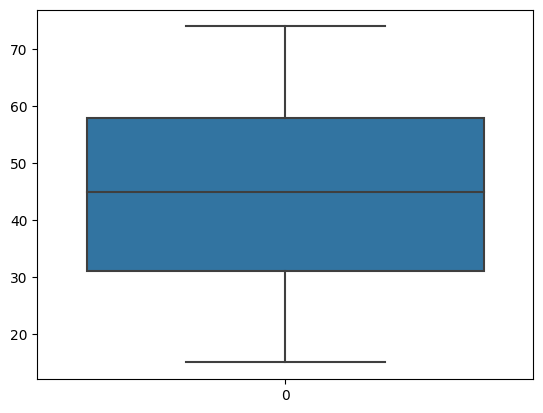

In [ ]:
# Data processing
sns.boxplot(df['Age'])

<Axes: >

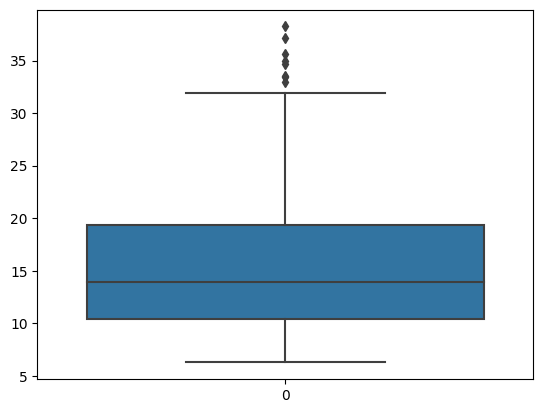

In [ ]:
sns.boxplot(df['Na_to_K'])

<Axes: >

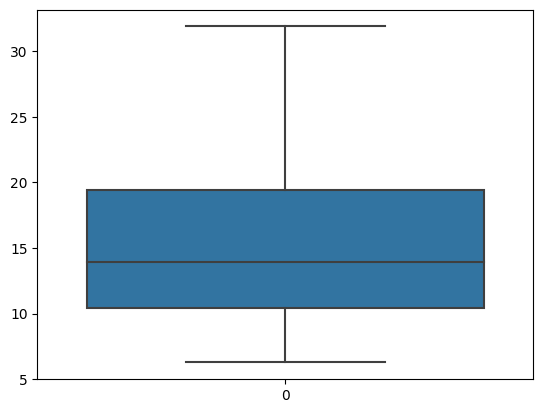

In [ ]:
# Replacing Outliers in column "Na_to_K" using median
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)
IQR = q3-q1 
upper_limit = q3+(1.5*IQR)
lower_limit = q3-(1.5*IQR)
med = df['Na_to_K'].median()  # median of column 'Na_to_K'
df['Na_to_K'] = np.where(df['Na_to_K']>upper_limit,30,df['Na_to_K'])
sns.boxplot(df['Na_to_K'])

In [ ]:
df.shape

(200, 6)

In [ ]:
# Label Encoding
le1 = LabelEncoder() # Initializing the lib
# for column 'Sex'
df['Sex']=le1.fit_transform(df['Sex'])
df['Sex']=le1.transform(df['Sex'])
df['Sex']

0      0
1      1
2      1
3      0
4      0
      ..
195    0
196    1
197    1
198    1
199    0
Name: Sex, Length: 200, dtype: int64

In [ ]:
# for column 'BP'
le2 = LabelEncoder()
df['BP']=le2.fit_transform(df['BP'])
df['BP']=le2.transform(df['BP'])
df['BP']

0      0
1      1
2      1
3      2
4      1
      ..
195    1
196    1
197    2
198    2
199    1
Name: BP, Length: 200, dtype: int64

In [ ]:
# for column 'Cholesterol'
le3 = LabelEncoder()
df['Cholesterol']=le3.fit_transform(df['Cholesterol'])
df['Cholesterol']=le3.transform(df['Cholesterol'])
df['Cholesterol']

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    1
Name: Cholesterol, Length: 200, dtype: int64

In [ ]:
# for column 'Drug'
le4 = LabelEncoder()
df['Drug']=le4.fit_transform(df['Drug'])
df['Drug']=le4.transform(df['Drug'])
df['Drug']

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int64

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [ ]:
# Splitting of Data
# Step 1 : Split data into dependent and independent variables
x = df.iloc[:,0:5] # Independent variables
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [ ]:
y = df.iloc[:,5:] # Dependent variables
y

,Drug
0,0
1,3
2,3
3,4
4,0
...,...
195,3
196,3
197,4
198,4


In [ ]:
# Step 2 : Split data into training and testing data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=22)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((160, 5), (40, 5), (160, 1), (40, 1))

In [ ]:
# ANN Model
model = Sequential() #Initializing the lib
# Input layer
model.add(Dense(5,activation='relu')) 
# Hidden layers
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
# Output Layers
model.add(Dense(5,activation='Softmax'))
# Compilation
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(xtrain,ytrain,batch_size=5,epochs=40,validation_data=(xtest,ytest))

Epoch 1/40
32/32 [==============================] - 2s 13ms/step - loss: 1.9769 - accuracy: 0.2937 - val_loss: 1.2627 - val_accuracy: 0.5250
Epoch 2/40
32/32 [==============================] - 0s 3ms/step - loss: 1.2140 - accuracy: 0.5437 - val_loss: 1.0954 - val_accuracy: 0.5750
Epoch 3/40
32/32 [==============================] - 0s 3ms/step - loss: 1.0949 - accuracy: 0.5813 - val_loss: 1.0467 - val_accuracy: 0.5500
Epoch 4/40
32/32 [==============================] - 0s 4ms/step - loss: 1.0784 - accuracy: 0.5500 - val_loss: 1.0235 - val_accuracy: 0.5500
Epoch 5/40
32/32 [==============================] - 0s 4ms/step - loss: 1.0496 - accuracy: 0.5562 - val_loss: 1.0000 - val_accuracy: 0.6000
Epoch 6/40
32/32 [==============================] - 0s 3ms/step - loss: 1.0363 - accuracy: 0.5750 - val_loss: 1.0326 - val_accuracy: 0.5500
Epoch 7/40
32/32 [==============================] - 0s 3ms/step - loss: 1.0120 - accuracy: 0.6000 - val_loss: 1.0133 - val_accuracy: 0.5500
Epoch 8/40
32/32 [=

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [ ]:
ypred = model.predict([[25,1,2,1,17.45]])
print(ypred)
ypred = np.argmax(ypred)
output = ['DrugY','drugC','drugX','drugA','drugB']
output[ypred]

1/1 [==============================] - 0s 60ms/step
[[6.8448925e-01 4.3288101e-03 5.3911895e-04 8.3743967e-02 2.2689883e-01]]


'DrugY'